In [21]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
event_description_data = pd.read_csv(r'C:\Users\chokh\Downloads\Data\User - Event Raw Dataset.csv', encoding = 'unicode_escape')
event_data = pd.read_csv(r'C:\Users\chokh\Downloads\Data\Event Description Mapping.csv', encoding = 'unicode_escape')

In [3]:
event_description_data.shape
event_data.shape

(17, 3)

In [4]:
event_description_data.shape

(41177, 5)

In [5]:
event_description_data['created_at_time'] = pd.to_datetime(event_description_data['created_at_time'], dayfirst=True)

In [6]:
print(event_data.columns)
print(event_description_data.columns)

Index(['Event', 'Description', 'Section'], dtype='object')
Index(['created_at_time', 'Event', 'org_id', 'project_id', 'user_id'], dtype='object')


In [8]:
merged_data = pd.merge(event_data, event_description_data, on='Event', how='left')


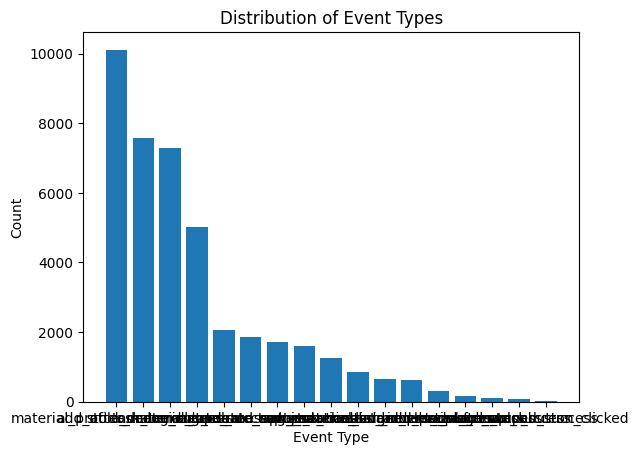

In [10]:
event_counts = merged_data['Event'].value_counts()
plt.bar(event_counts.index, event_counts.values)
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.title('Distribution of Event Types')
plt.show()

In [11]:
daily_engagement = merged_data.resample('D', on='created_at_time')['user_id'].nunique()


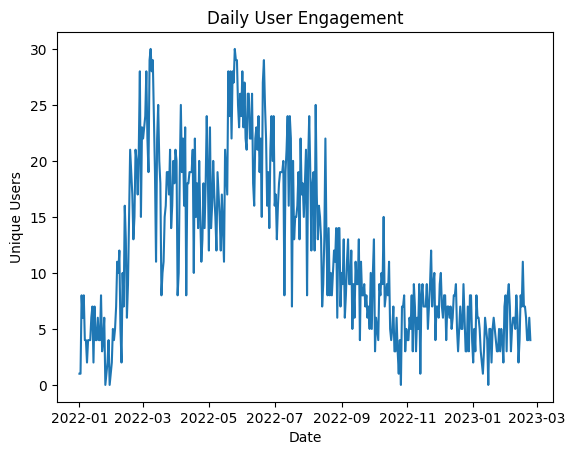

In [12]:
plt.plot(daily_engagement.index, daily_engagement.values)
plt.xlabel('Date')
plt.ylabel('Unique Users')
plt.title('Daily User Engagement')
plt.show()

In [22]:
from sklearn.cluster import KMeans


In [28]:
user_behavior = merged_data.pivot_table(index='user_id', columns='Event', values='created_at_time', aggfunc='count', fill_value=0)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
user_segments = kmeans.fit_predict(user_behavior)

In [30]:
user_segment_dict = dict(zip(user_behavior.index, user_segments))


In [31]:
merged_data['user_segment'] = merged_data['user_id'].map(user_segment_dict)


In [34]:
engagement_by_segment = merged_data.groupby('user_segment')['user_id'].count()
print(engagement_by_segment)

user_segment
0    26946
1     9594
2     4637
Name: user_id, dtype: int64


In [36]:
merged_data['user_segment'] = pd.Categorical(merged_data['user_segment'])
merged_data['user_segment'] = merged_data['user_segment'].cat.codes

In [41]:
print(merged_data.dtypes)


Event                      object
Description                object
Section                    object
created_at_time    datetime64[ns]
org_id                     object
project_id                 object
user_id                    object
user_segment                 int8
dtype: object


In [39]:
trigger_events = merged_data.groupby('Event')['user_id'].count().nlargest(5)
print(trigger_events)

Event
material_profile_material_load    10114
add_attendance_success             7569
stock_material_updated             7272
task_log_create_success            5010
comment_create_success             2054
Name: user_id, dtype: int64
